In [1]:
# Import Library
import pandas as pd

In [2]:
# Load The Dataset
df = pd.read_csv(r"D:\Student Engagement Analytics for EdTech\Dataset\Courses.csv")

In [3]:
# Preview Top 5 Rows
df.head()

,userid_DI,registered,viewed,explored,certified,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters
0,MHxPC130442623,1,0,0,0,19-12-2012,17-11-2013,NaN,9.0,NaN,NaN
1,MHxPC130442623,1,1,0,0,15-10-2012,NaN,NaN,9.0,NaN,1.0
2,MHxPC130275857,1,0,0,0,08-02-2013,17-11-2013,NaN,16.0,NaN,NaN
3,MHxPC130275857,1,0,0,0,17-09-2012,NaN,NaN,16.0,NaN,NaN
4,MHxPC130275857,1,0,0,0,19-12-2012,NaN,NaN,16.0,NaN,NaN


In [4]:
# Shape of the data
df.shape

(641138, 11)

In [5]:
## Column Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   userid_DI      641138 non-null  object 
 1   registered     641138 non-null  int64  
 2   viewed         641138 non-null  int64  
 3   explored       641138 non-null  int64  
 4   certified      641138 non-null  int64  
 5   start_time_DI  641138 non-null  object 
 6   last_event_DI  462184 non-null  object 
 7   nevents        441987 non-null  float64
 8   ndays_act      478395 non-null  float64
 9   nplay_video    183608 non-null  float64
 10  nchapters      382385 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 53.8+ MB


In [6]:
## Null Values
df.isnull().sum()

userid_DI             0
registered            0
viewed                0
explored              0
certified             0
start_time_DI         0
last_event_DI    178954
nevents          199151
ndays_act        162743
nplay_video      457530
nchapters        258753
dtype: int64

In [7]:
# Convert date columns
df['start_time_DI'] = pd.to_datetime(df['start_time_DI'], dayfirst=True)
df['last_event_DI'] = pd.to_datetime(df['last_event_DI'], errors='coerce', dayfirst=True)

In [8]:
# Check missing after conversion
print(df.isnull().sum())

userid_DI             0
registered            0
viewed                0
explored              0
certified             0
start_time_DI         0
last_event_DI    178954
nevents          199151
ndays_act        162743
nplay_video      457530
nchapters        258753
dtype: int64


In [9]:
# Create engagement duration
df['engagement_duration'] = (df['last_event_DI'] - df['start_time_DI']).dt.days

In [10]:
# Fill NaN for numeric columns if it makes sense (e.g., 0 for no activity)
df['nevents'] = df['nevents'].fillna(0)
df['ndays_act'] = df['ndays_act'].fillna(0)
df['nplay_video'] = df['nplay_video'].fillna(0)
df['nchapters'] = df['nchapters'].fillna(0)

In [11]:
# Inspect again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   userid_DI            641138 non-null  object        
 1   registered           641138 non-null  int64         
 2   viewed               641138 non-null  int64         
 3   explored             641138 non-null  int64         
 4   certified            641138 non-null  int64         
 5   start_time_DI        641138 non-null  datetime64[ns]
 6   last_event_DI        462184 non-null  datetime64[ns]
 7   nevents              641138 non-null  float64       
 8   ndays_act            641138 non-null  float64       
 9   nplay_video          641138 non-null  float64       
 10  nchapters            641138 non-null  float64       
 11  engagement_duration  462184 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(4), object(1)
memory usage: 58.7

In [12]:
# Final shape check
df.shape

(641138, 12)

# Exploratory Data Analysis (EDA)

In [13]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## User counts by key flags

In [14]:
counts = df[['registered', 'viewed', 'explored', 'certified']].sum()
print(counts)

registered    641138
viewed        400262
explored       39686
certified      17687
dtype: int64


## Distribution of engagement duration (drop NaNs)

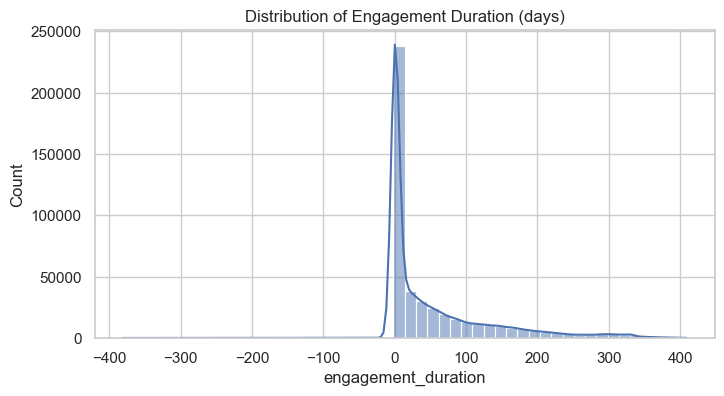

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['engagement_duration'].dropna(), bins=50, kde=True)
plt.title('Distribution of Engagement Duration (days)')
plt.show()

## Average engagement by certified status

In [16]:
avg_by_cert = df.groupby('certified')[['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'engagement_duration']].mean()
print(avg_by_cert)

               nevents  ndays_act  nplay_video  nchapters  engagement_duration
certified                                                                     
0           159.177162   3.051738    19.663905   1.754946            46.170075
1          5159.765930  46.878951   499.057387  16.714310           158.175502


## Correlation heatmap (numeric only)

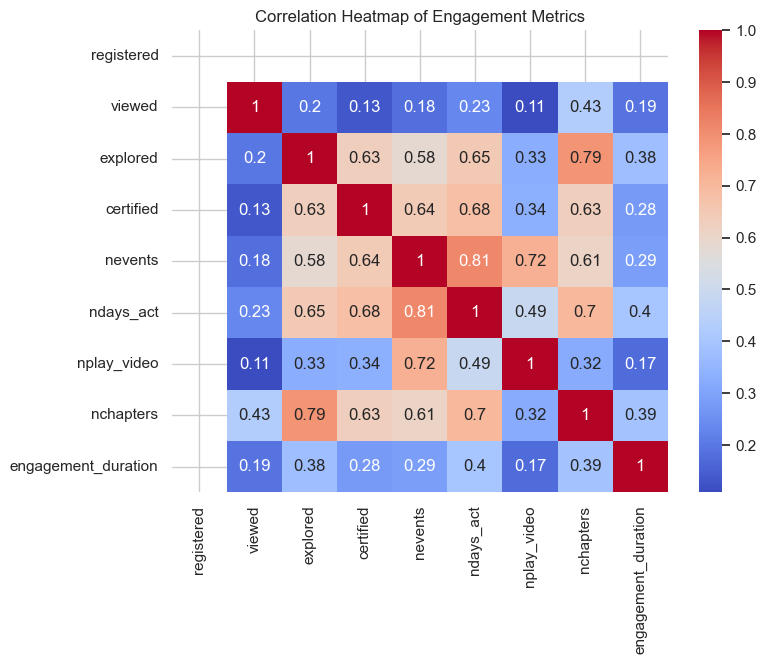

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Engagement Metrics')
plt.show()

# Product Insights & Hypothesis Testing

### Compare engagement metrics by registered status

In [18]:
reg_engagement = df.groupby('registered')[['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'engagement_duration']].mean()
print("Engagement by Registration Status:\n", reg_engagement)

Engagement by Registration Status:
                nevents  ndays_act  nplay_video  nchapters  engagement_duration
registered                                                                    
1           297.127827   4.260794    32.888877   2.167628            50.453425


### Certification rate among registered vs non-registered

In [19]:
cert_rate = df.groupby('registered')['certified'].mean()
print("\nCertification Rate by Registration Status:\n", cert_rate)


Certification Rate by Registration Status:
 registered
1    0.027587
Name: certified, dtype: float64


### Users with high engagement but no certification

In [20]:
high_eng_no_cert = df[(df['certified'] == 0) & (df['nevents'] > df['nevents'].median())]
print("\nNumber of users with high activity but no certification:", high_eng_no_cert.shape[0])


Number of users with high activity but no certification: 296534


### Visualize certification by engagement duration

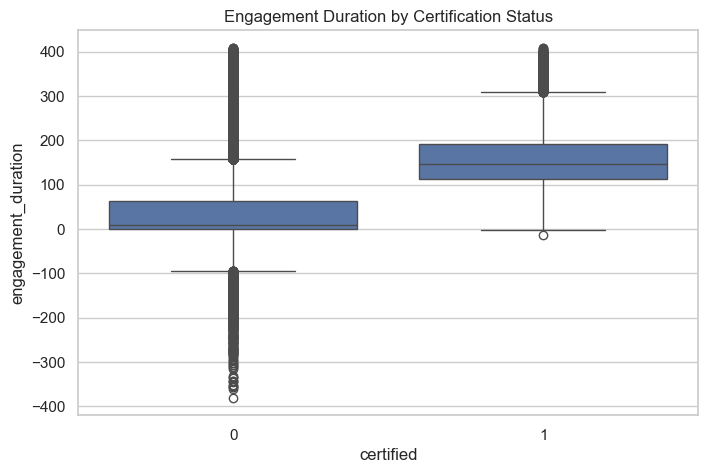

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='certified', y='engagement_duration', data=df)
plt.title("Engagement Duration by Certification Status")
plt.show()

# Visualization Summary

### 📊 Chart 1: Engagement Metrics by Registered Status

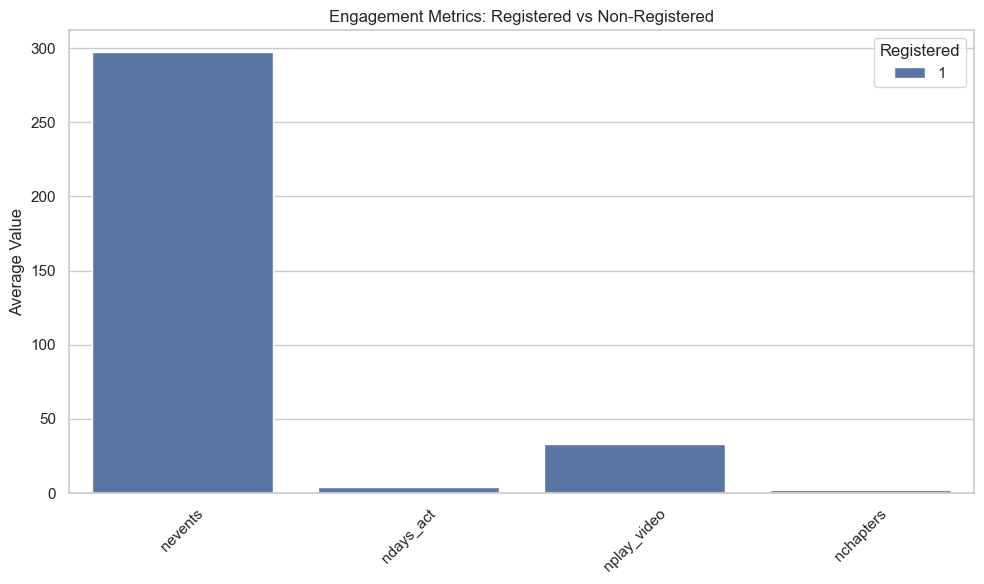

In [22]:
reg_metrics = df.groupby('registered')[['nevents', 'ndays_act', 'nplay_video', 'nchapters']].mean().reset_index()

reg_metrics_melted = reg_metrics.melt(id_vars='registered', var_name='Metric', value_name='Average')

plt.figure(figsize=(10,6))
sns.barplot(data=reg_metrics_melted, x='Metric', y='Average', hue='registered')
plt.title("Engagement Metrics: Registered vs Non-Registered")
plt.xlabel("")
plt.ylabel("Average Value")
plt.legend(title="Registered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📊 Chart 2: Certification by Engagement Duration

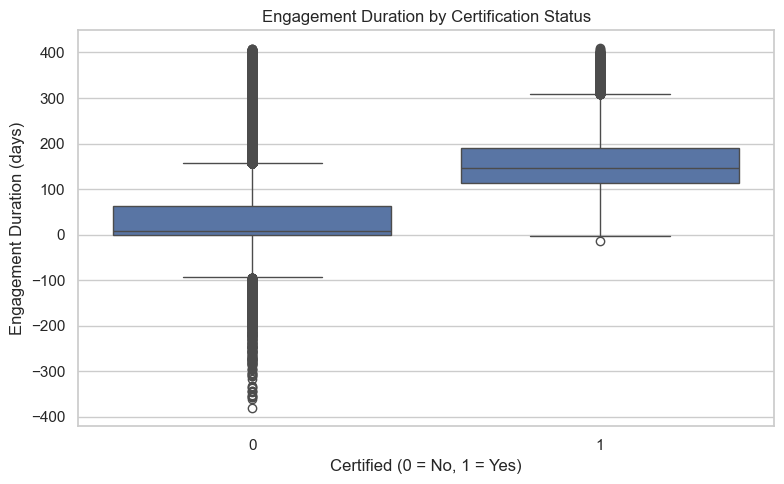

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='certified', y='engagement_duration', data=df)
plt.title("Engagement Duration by Certification Status")
plt.xlabel("Certified (0 = No, 1 = Yes)")
plt.ylabel("Engagement Duration (days)")
plt.tight_layout()
plt.show()

### 📊 Chart 3: Distribution: Number of Events

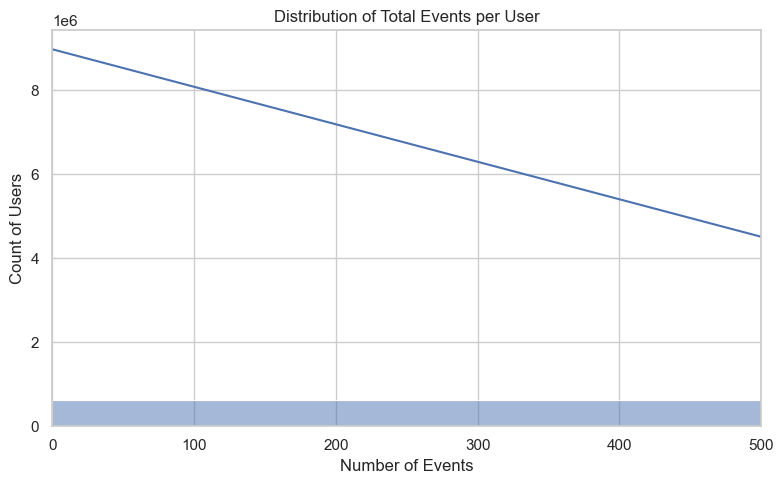

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['nevents'], bins=50, kde=True)
plt.title("Distribution of Total Events per User")
plt.xlabel("Number of Events")
plt.ylabel("Count of Users")
plt.xlim(0, 500)  # Optional: focus range
plt.tight_layout()
plt.show()

### 📊 Chart 4: Video Plays vs Certification

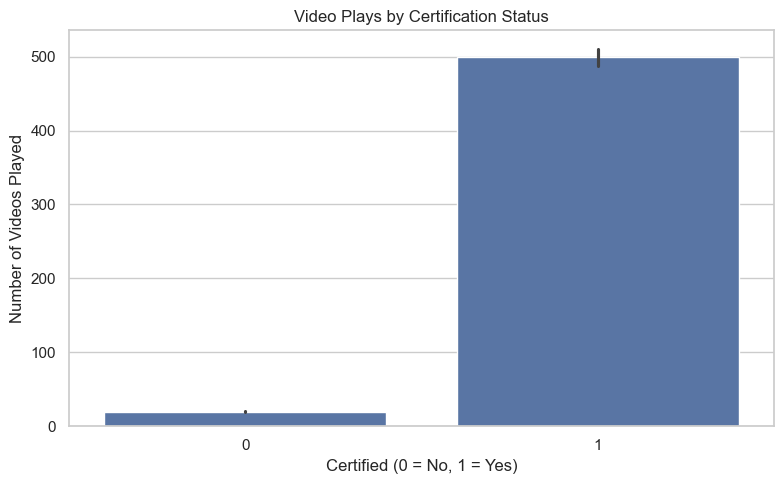

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='certified', y='nplay_video', data=df)
plt.title("Video Plays by Certification Status")
plt.xlabel("Certified (0 = No, 1 = Yes)")
plt.ylabel("Number of Videos Played")
plt.tight_layout()
plt.show()

### 📊 Chart 4: Chapters Viewed vs Certified

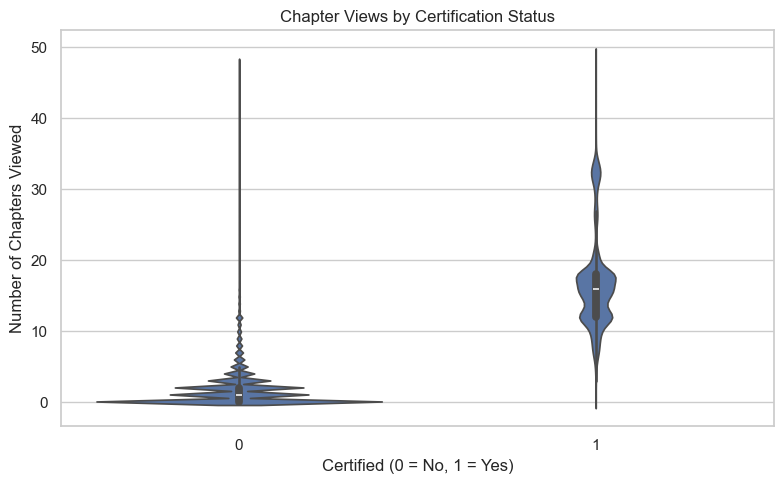

In [26]:
plt.figure(figsize=(8,5))
sns.violinplot(x='certified', y='nchapters', data=df)
plt.title("Chapter Views by Certification Status")
plt.xlabel("Certified (0 = No, 1 = Yes)")
plt.ylabel("Number of Chapters Viewed")
plt.tight_layout()
plt.show()

## 📊 Business Insights Summary – Student Engagement Analytics

### 🔍 Key Questions Answered:
- Are registered users more engaged than non-registered users?
- What is the certification rate among registered users?
- Do high engagement levels lead to certification?
- Which engagement behaviors are strongest among certified users?
- Where are the drop-offs or missed opportunities for product improvement?

---

### 🧠 Insights:

- ✅ **Registered users** are significantly more engaged, averaging ~297 events, 4.26 active days, and ~33 videos watched — highlighting the importance of sign-ups.
- ⚠️ **Certification rate** among registered users is only ~2.75%, showing a **gap between engagement and achievement**.
- 🔍 Over **296,000 highly active users** didn’t earn certificates — suggesting **friction in course progression or unclear incentives**.
- 📺 **Certified users** tend to watch more videos and stay active longer — suggesting these as **key behavioral predictors** of success.
- 🧩 **Wide variation** in events and video plays suggests opportunity to segment users into personas (passive, active, super-engaged).

---